<a href="https://colab.research.google.com/github/stevenfox/Clustering_K_Means/blob/master/Task_1_K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Unsupervised Learning with K-means and EM for Dog Breed Data Clustering and EDA 

## 1.1 Explain K-Means clustering

*The explanation is covered in the technical report*

## 1.2 Read File

In [0]:
# Load all necessary libaries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
data = pd.read_csv("dataset.csv") 
data.head()

,height,tail length,leg length,nose circumference
0,5.151,3.535,1.414,0.202
1,4.949,3.030,1.414,0.202
2,4.747,3.232,1.313,0.202
3,4.646,3.131,1.515,0.202
4,5.050,3.636,1.414,0.202


## 1.3 Exploratory data analysis (EDA) on data

*The detailed analysis is covered in the techinical report*

In [5]:
data.shape

(300, 4)

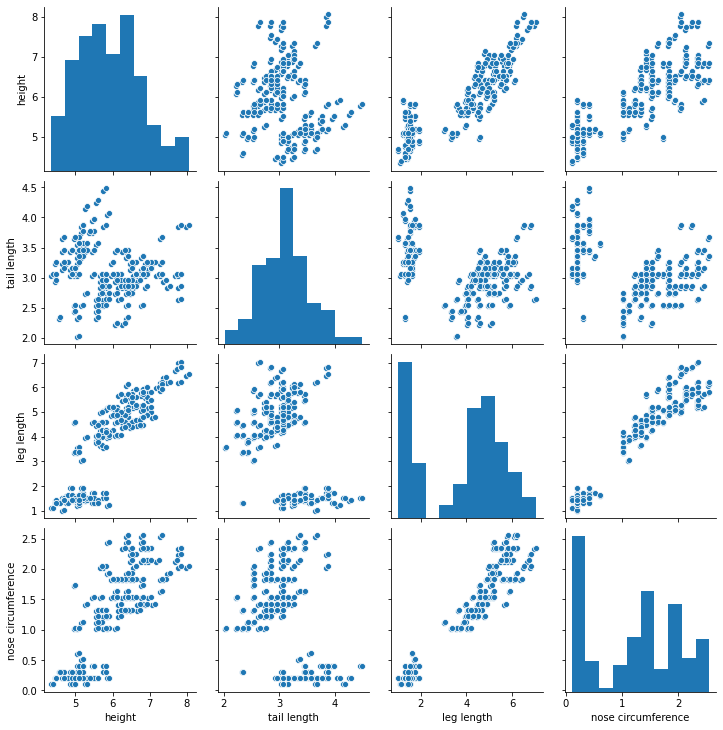

In [6]:
sns.pairplot(data)

In [7]:
data.describe()

,height,tail length,leg length,nose circumference
count,300.000000,300.000000,300.00000,300.000000
mean,5.930983,3.103193,3.81437,1.217323
std,0.839601,0.441935,1.78890,0.772409
min,4.343000,2.020000,1.01000,0.101000
25%,5.202000,2.828000,1.61600,0.305250
50%,5.858000,3.060000,4.41500,1.326000
75%,6.528000,3.366000,5.20200,1.836000
max,8.058000,4.488000,7.03800,2.550000


In [8]:
data = pd.read_csv('dataset.csv').to_numpy()
np.random.shuffle(data) # shuffle rows
data

array([[6.262, 2.828, 4.848, 1.818],
       [6.936, 3.06 , 5.61 , 2.142],
       [6.969, 3.232, 5.757, 2.323],
       ...,
       [5.757, 2.929, 4.242, 1.313],
       [4.794, 3.264, 1.632, 0.204],
       [5.656, 2.929, 3.636, 1.313]])

## 1.4 Deployment of K-means and EM clustering algorithms


### K-Means Algorithm: Lloyd’s (Simple)

In [0]:
from timeit import default_timer as timer
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [0]:
# function that plots kmeans clustering 

def plot_kmeans(y_kmeans, centroid, X, n_clusters=4, rseed=0, ax=None):
    labels = y_kmeans

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis', zorder=2, label='clusters')
    ax.margins(x=0, y=-0.20)
    ax.legend()
    # plot the representation of the K-Means model
    centers = centroid
    ax.scatter(centroid[:, 0], centroid[:, 1], c='r', s=250, alpha=0.4, zorder=2, label='centroid', marker='P')
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

In [0]:
def kmeans_simple(data, K):
  start = timer()
  cluster_dic = {}
  model = KMeans(n_clusters = K)
  model.fit(data)
  centroid = model.cluster_centers_
  labels = model.labels_
  y_kmeans = model.predict(data)

  # sum of squared distances of samples to the nearest centroid
  distance = model.inertia_ 

  for i, j in enumerate(data):    
    _label = labels[i]
    if _label not in cluster_dic.keys():
       #print('shape: ',np.reshape(j, (1, len(j))))
       cluster_dic[_label] =  np.reshape(j, (1, len(j)))
    else:
       cluster_dic[_label] = np.append(cluster_dic[_label], np.reshape(j, (1, len(j))), axis = 0 )
       
  end = timer()
  time = 'Elapsed time is %0.3f' % float(end - start), 'seconds'
  
  return time, y_kmeans, centroid, distance, cluster_dic
  


### K = 3


In [153]:
K = 3
time, y_kmeans, centroid, distance, clusters_dic = kmeans_simple(data, K)
print(*time)

Elapsed time is 0.037 seconds


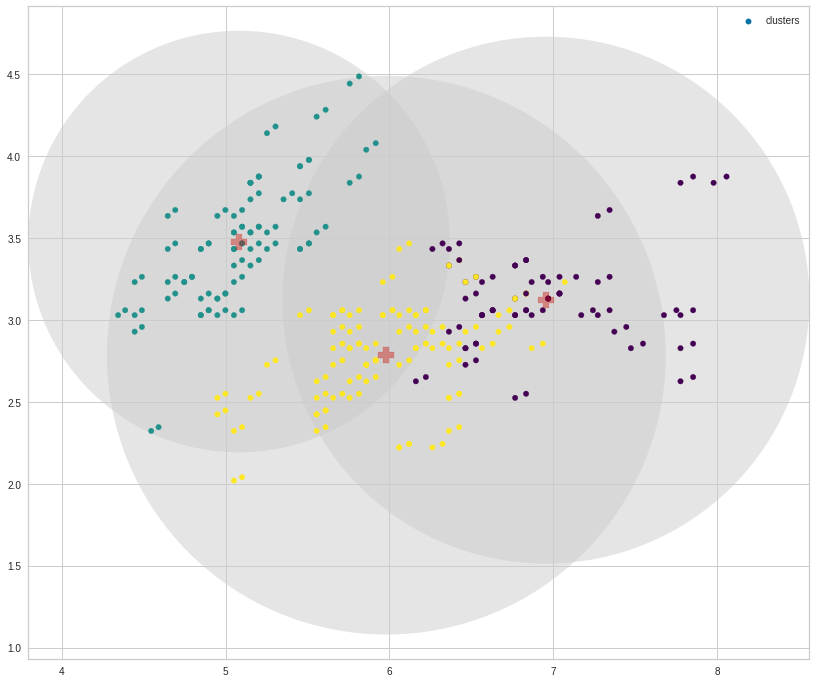

In [154]:
plt.figure(figsize=(14,12))
plot_kmeans(y_kmeans, centroid , data)

### K = 4

In [155]:
K = 4
time, y_kmeans, centroid, distance, clusters_dic = kmeans_simple(data, K)
print(*time)

Elapsed time is 0.040 seconds


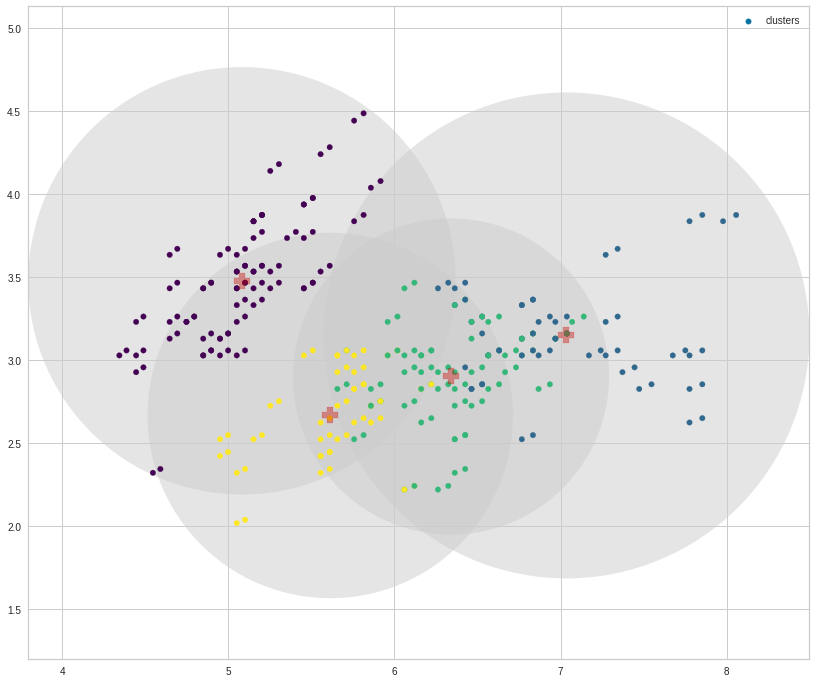

In [156]:
plt.figure(figsize=(14,12))
plot_kmeans(y_kmeans, centroid , data)

### K-Means Algorithm: Expectation–Maximization

In [0]:
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import mean_squared_error

In [0]:
def k_means_EM(X, n_clusters, rseed=2):
    start = timer()
    cluster_em_dic = {}
    
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels, distance = pairwise_distances_argmin_min(X, centers)


        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers

        # print(labels)
        mse = mean_squared_error(labels, distance)

    for i, j in enumerate(data):
      _label = labels[i]
      if _label not in cluster_em_dic.keys():
        cluster_em_dic[_label] =  np.reshape(j, (1, len(j)))
      else:
        cluster_em_dic[_label] = np.append(cluster_em_dic[_label], np.reshape(j, (1, len(j))), axis = 0 )
    end = timer()
    time = 'Elapsed time is %0.3f' % float(end - start), 'seconds'   
     
    return  time,mse, cluster_em_dic, distance, centers, labels




### K = 3

In [159]:
K = 3
time, mse, cluster_em_dic, _, centers, labels = k_means_EM(data, K)
print(*time)

Elapsed time is 0.011 seconds


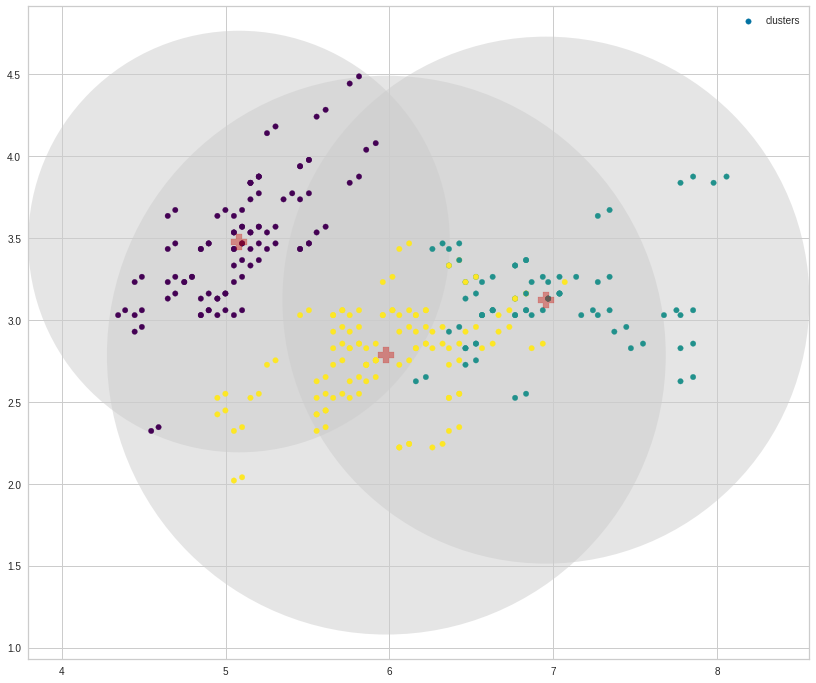

In [160]:
plt.figure(figsize=(14,12))
plot_kmeans(labels, centers , data)

### K = 4

In [161]:
K = 4
time, mse, cluster_em_dic, _, centers, labels = k_means_EM(data, K)
print(*time)

Elapsed time is 0.014 seconds


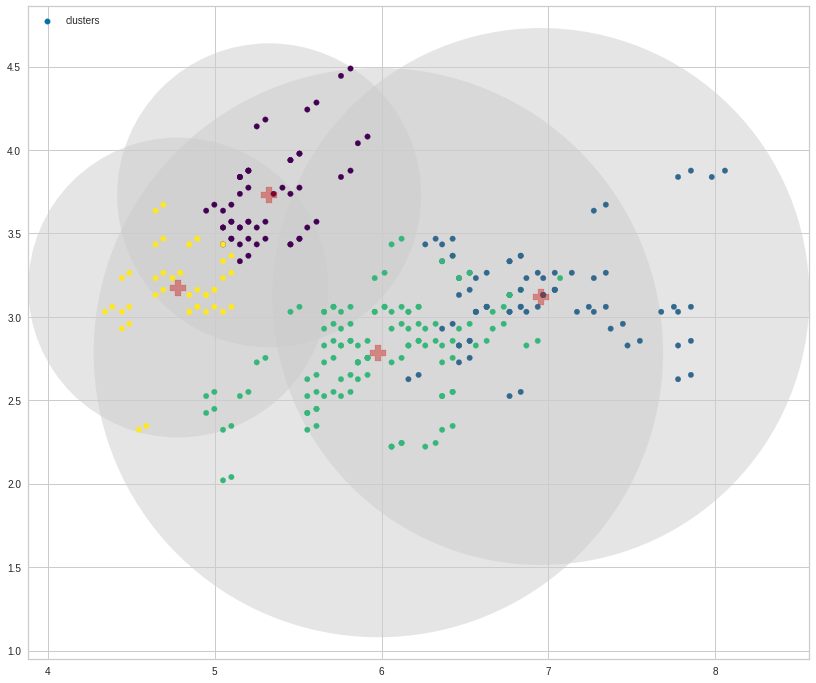

In [162]:
plt.figure(figsize=(14,12))
plot_kmeans(labels, centers , data)

## 1.5 K-Means Performance Evaluation 

### Manual Elbow Method

In [0]:
def aggregate_distance(data):
    all_distance = []
    for k in range(1,10):
        vector = []
        vector.append(k)
        _, _, centroid, distance, clusters_set = kmeans_simple(data, k)
        vector.append(distance)
        all_distance.append(np.array(vector))
    return np.array(all_distance)

Text(0, 0.5, 'Sum of squared distance')

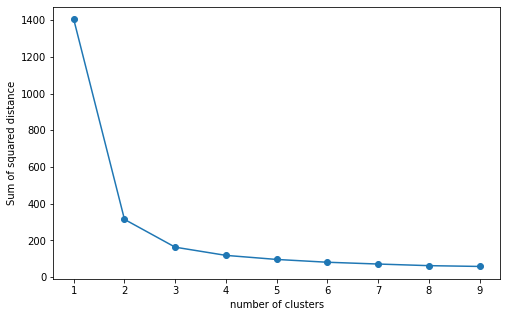

In [120]:
all_distance = aggregate_distance(data)
plt.figure(figsize=(8,5))
plt.plot(all_distance[:,0],all_distance[:,1],'o-')
plt.xlabel('number of clusters')
plt.ylabel('Sum of squared distance')

### Utilising KElbowVisualizer for consistency to the manual elbow method above

In [0]:
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f28705958d0>,
                 k=None, metric=None, model=None, timings=True)

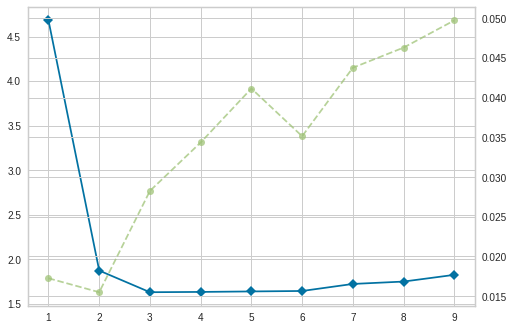

In [148]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data)        # Fit the data to the visualizer

## Elbow Method


In [0]:
def aggregate_distance_em(data):
    all_distance = []
    for k in range(1,10):
        vector = []
        vector.append(k)
        _, mse, cluster_em_dic, distance, centroid, labels = k_means_EM(data, k)
        vector.append(mse)
        all_distance.append(np.array(vector))
    return np.array(all_distance)

Text(0, 0.5, 'Sum of squared distance')

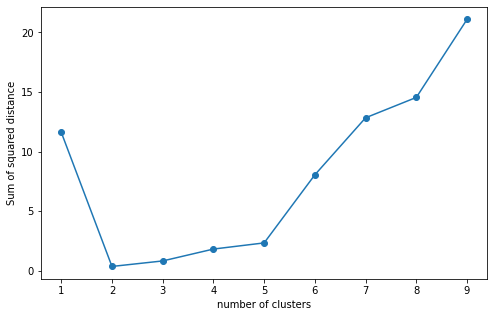

In [138]:
all_distance_em =aggregate_distance_em(data)
plt.figure(figsize=(8,5))
plt.plot(all_distance_em[:,0],all_distance_em[:,1],'o-')
plt.xlabel('number of clusters')
plt.ylabel('Sum of squared distance')

### E–M: Gaussian Mixture Model

### K = 3

In [0]:
from sklearn.mixture import GaussianMixture as GMM


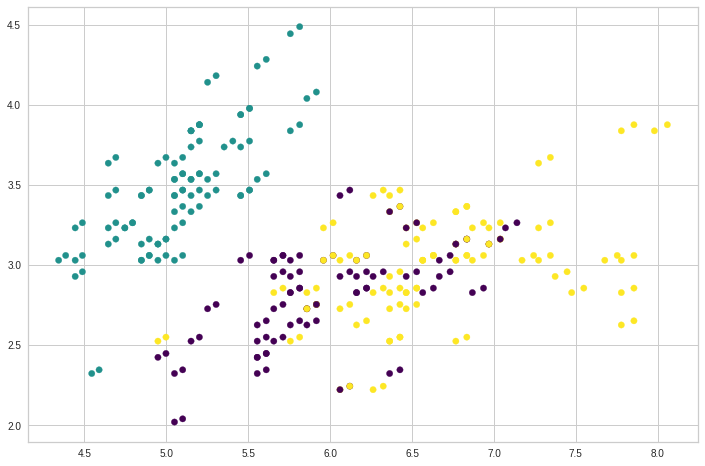

In [164]:
K= 3 

gmm = GMM(n_components=K).fit(data)
labels = gmm.predict(data)
plt.figure(figsize=(12,8))
plt.scatter(data[:, 0], data[:, 1], c=labels, s=40, cmap='viridis');


### K = 4

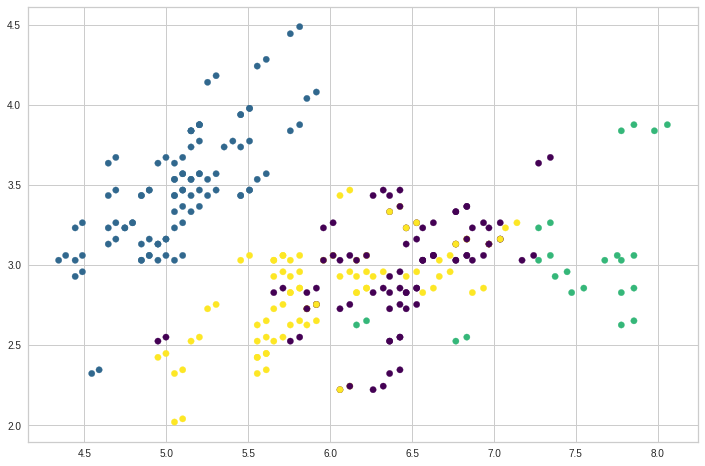

In [165]:
K= 4

gmm = GMM(n_components=K).fit(data)
labels = gmm.predict(data)
plt.figure(figsize=(12,8))
plt.scatter(data[:, 0], data[:, 1], c=labels, s=40, cmap='viridis');


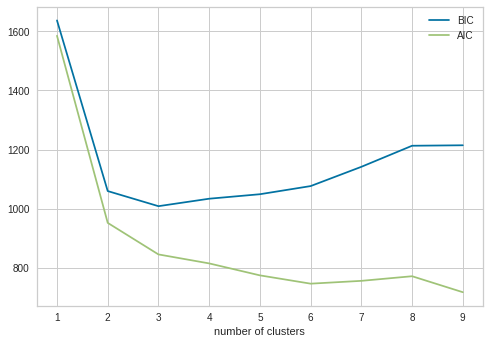

In [166]:
n_components = np.arange(1, 10)
models = [GMM(n, covariance_type='full', random_state=0).fit(data)
          for n in n_components]

plt.plot(n_components, [m.bic(data) for m in models], label='BIC')
plt.plot(n_components, [m.aic(data) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('number of clusters');